In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df=pd.read_csv('zomato.csv')

In [219]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [221]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [222]:
columns = ['url','address','name','phone','dish_liked','reviews_list','menu_item']
df.drop(columns, inplace=True, axis=1)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [224]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [225]:
df.dropna(subset = ['rate'], inplace=True)

In [226]:
df.loc[df["rate"] == 'NEW']

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
110,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,Delivery,Banashankari
130,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,Delivery,Banashankari
131,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51585,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200,Dine-out,Whitefield
51586,Yes,No,NEW,0,Whitefield,Quick Bites,Chinese,200,Dine-out,Whitefield
51603,Yes,No,NEW,0,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250,Dine-out,Whitefield
51604,No,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,Dine-out,Whitefield


In [227]:
df.loc[df["rate"] == '-']

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
3068,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400,Delivery,Basavanagudi
3069,No,No,-,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery,Basavanagudi
3373,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300,Dine-out,Basavanagudi
3378,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,Dine-out,Basavanagudi
3387,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300,Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...
33454,No,No,-,0,BTM,Quick Bites,"South Indian, North Indian, Chinese",300,Delivery,Koramangala 6th Block
33463,No,No,-,0,BTM,Casual Dining,"North Indian, South Indian, Chinese, Kerala",500,Delivery,Koramangala 6th Block
45646,Yes,No,-,0,Old Airport Road,Quick Bites,"South Indian, North Indian, Chinese, Beverages",400,Dine-out,Old Airport Road
45647,Yes,No,-,0,Old Airport Road,Beverage Shop,Beverages,250,Dine-out,Old Airport Road


In [228]:
list1 = ['NEW','-']
df=df[df.rate.isin(list1) == False]

In [229]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [230]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [231]:
df['rate'] = df['rate'].apply(lambda x: 1 if x > 3.75 else 0)
df = df.rename(columns={'rate': 'Target'})

In [232]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [233]:
df.head()

,online_order,book_table,Target,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,1,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,0,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,1,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [234]:
df.isnull().sum()

online_order                     0
book_table                       0
Target                           0
votes                            0
location                         0
rest_type                      149
cuisines                        11
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [235]:
df=df.dropna()

In [236]:
df.duplicated().sum()

99

In [237]:
df=df.drop_duplicates()

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41164 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 41164 non-null  object 
 1   book_table                   41164 non-null  object 
 2   Target                       41164 non-null  int64  
 3   votes                        41164 non-null  int64  
 4   location                     41164 non-null  object 
 5   rest_type                    41164 non-null  object 
 6   cuisines                     41164 non-null  object 
 7   approx_cost(for two people)  41164 non-null  float64
 8   listed_in(type)              41164 non-null  object 
 9   listed_in(city)              41164 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [239]:
df['Target'].value_counts()

Target
0    21128
1    20036
Name: count, dtype: int64

In [240]:
df.columns

Index(['online_order', 'book_table', 'Target', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

<Axes: xlabel='online_order', ylabel='count'>

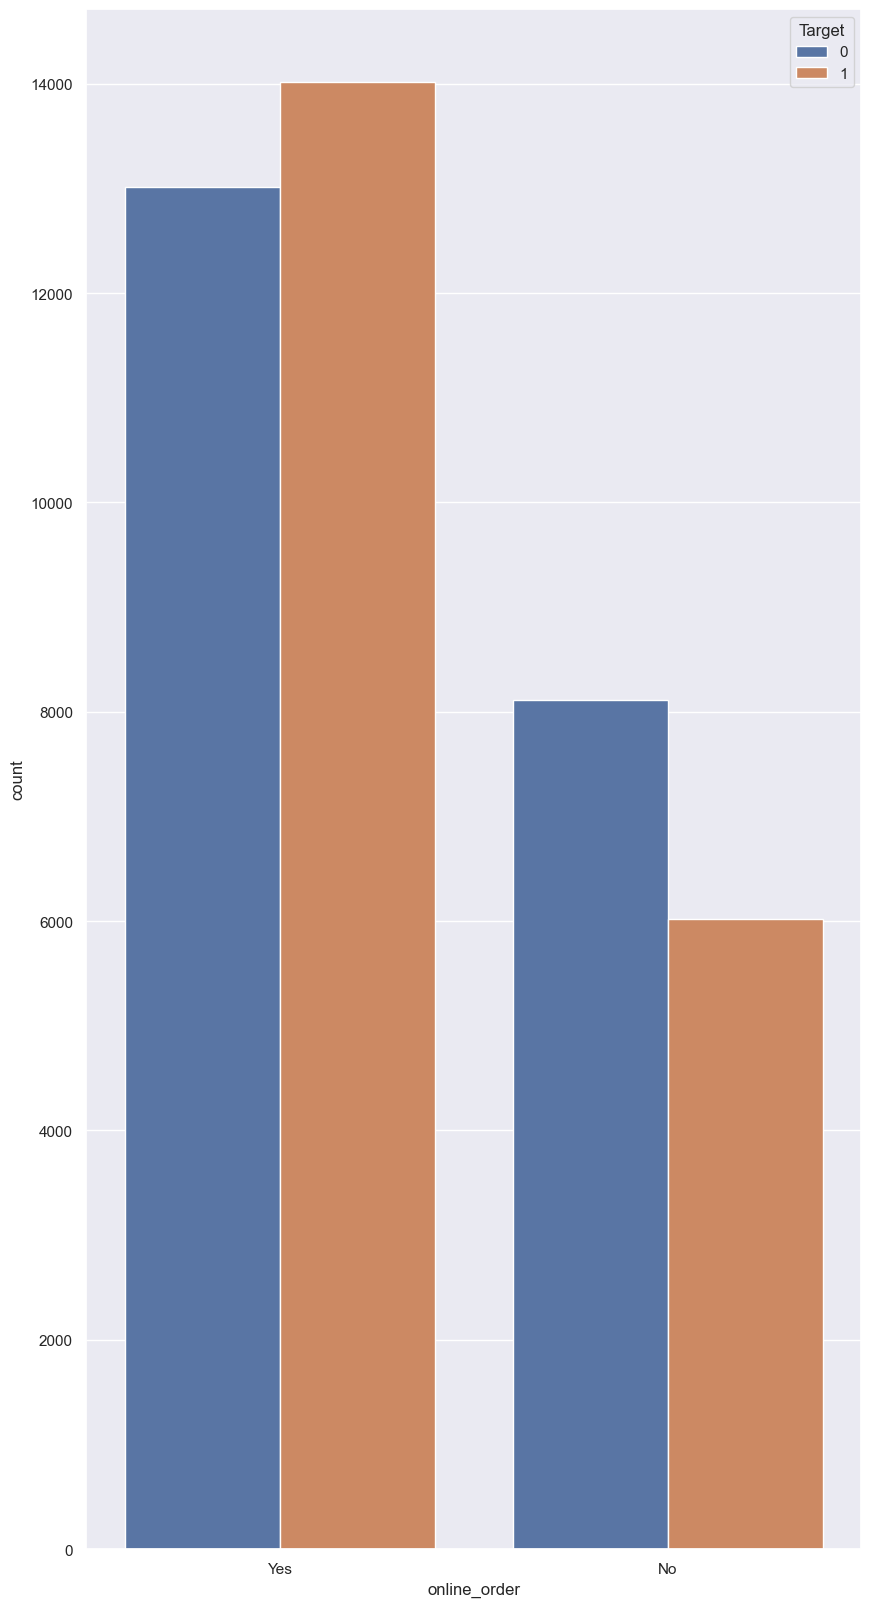

In [241]:
sns.countplot(df, x="online_order", hue="Target")

It seems like online ordering affects on our target.

<Axes: xlabel='book_table', ylabel='count'>

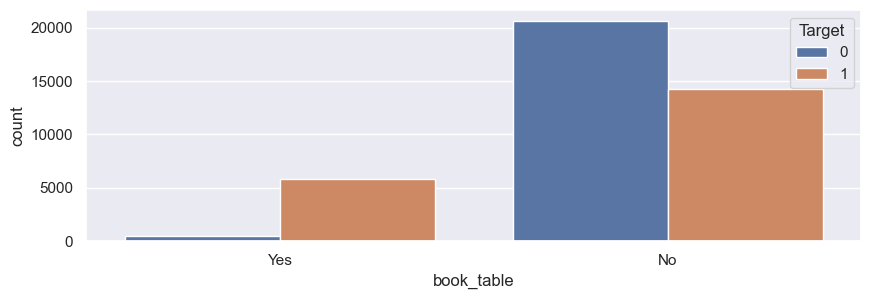

In [242]:
sns.set(rc={'figure.figsize':(10,3)})
sns.countplot(df, x="book_table", hue="Target")

The availability of booking table affects the target obviously.

<Axes: xlabel='votes', ylabel='Target'>

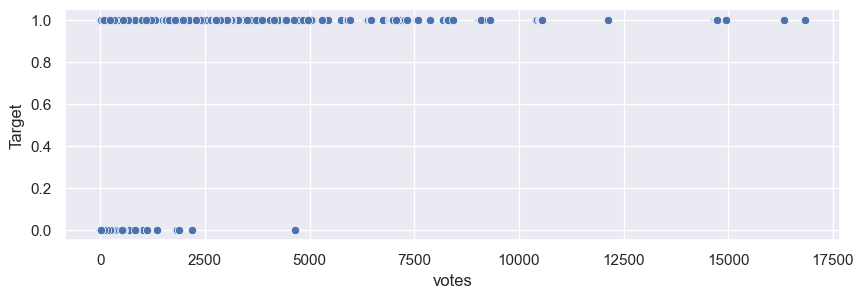

In [243]:
sns.scatterplot(df, x="votes", y="Target")

C:\Users\aaa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


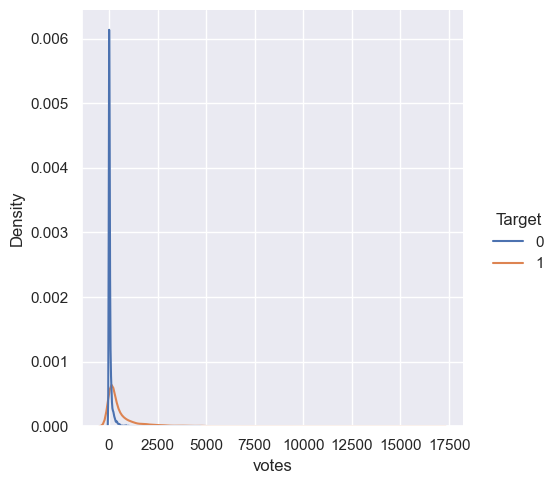

In [244]:
sns.set(rc={'figure.figsize':(15,3)})
sns.displot(data=df, x="votes", kind="kde",hue='Target')

In [245]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [246]:
len(df['location'].unique())

92

In [247]:
df['location'].value_counts()

location
BTM                      3863
Koramangala 5th Block    2295
HSR                      1991
Indiranagar              1794
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64

In [248]:
df['locations_standardized'] = df['location'].apply(lambda x: ', '.join(sorted(x.split(', '))))

unique_values = df['locations_standardized'].unique()
len(unique_values)

92

There's no repeated values in location column.

In [249]:
threshold = 100
category_counts = df['location'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
len(rare_categories)
#rare_categories

35

In [250]:
df['other_location_col'] = df['location'].apply(lambda x: 'Other' if x in rare_categories else x)

In [251]:
len(df['other_location_col'].unique())

58

In [252]:
df['other_location_col'].value_counts()

other_location_col
BTM                      3863
Koramangala 5th Block    2295
HSR                      1991
Indiranagar              1794
JP Nagar                 1710
Jayanagar                1634
Whitefield               1565
Marathahalli             1407
Other                    1309
Bannerghatta Road        1223
Koramangala 7th Block    1053
Koramangala 6th Block    1052
Brigade Road             1048
Bellandur                 996
Sarjapur Road             852
Koramangala 1st Block     851
Koramangala 4th Block     841
Ulsoor                    839
Electronic City           832
MG Road                   792
Banashankari              744
Kalyan Nagar              692
Malleshwaram              641
Richmond Road             603
Residency Road            601
Basavanagudi              592
Frazer Town               563
Church Street             543
Brookefield               543
New BEL Road              506
Kammanahalli              492
Lavelle Road              476
Cunningham Road      

<Axes: xlabel='count', ylabel='other_location_col'>

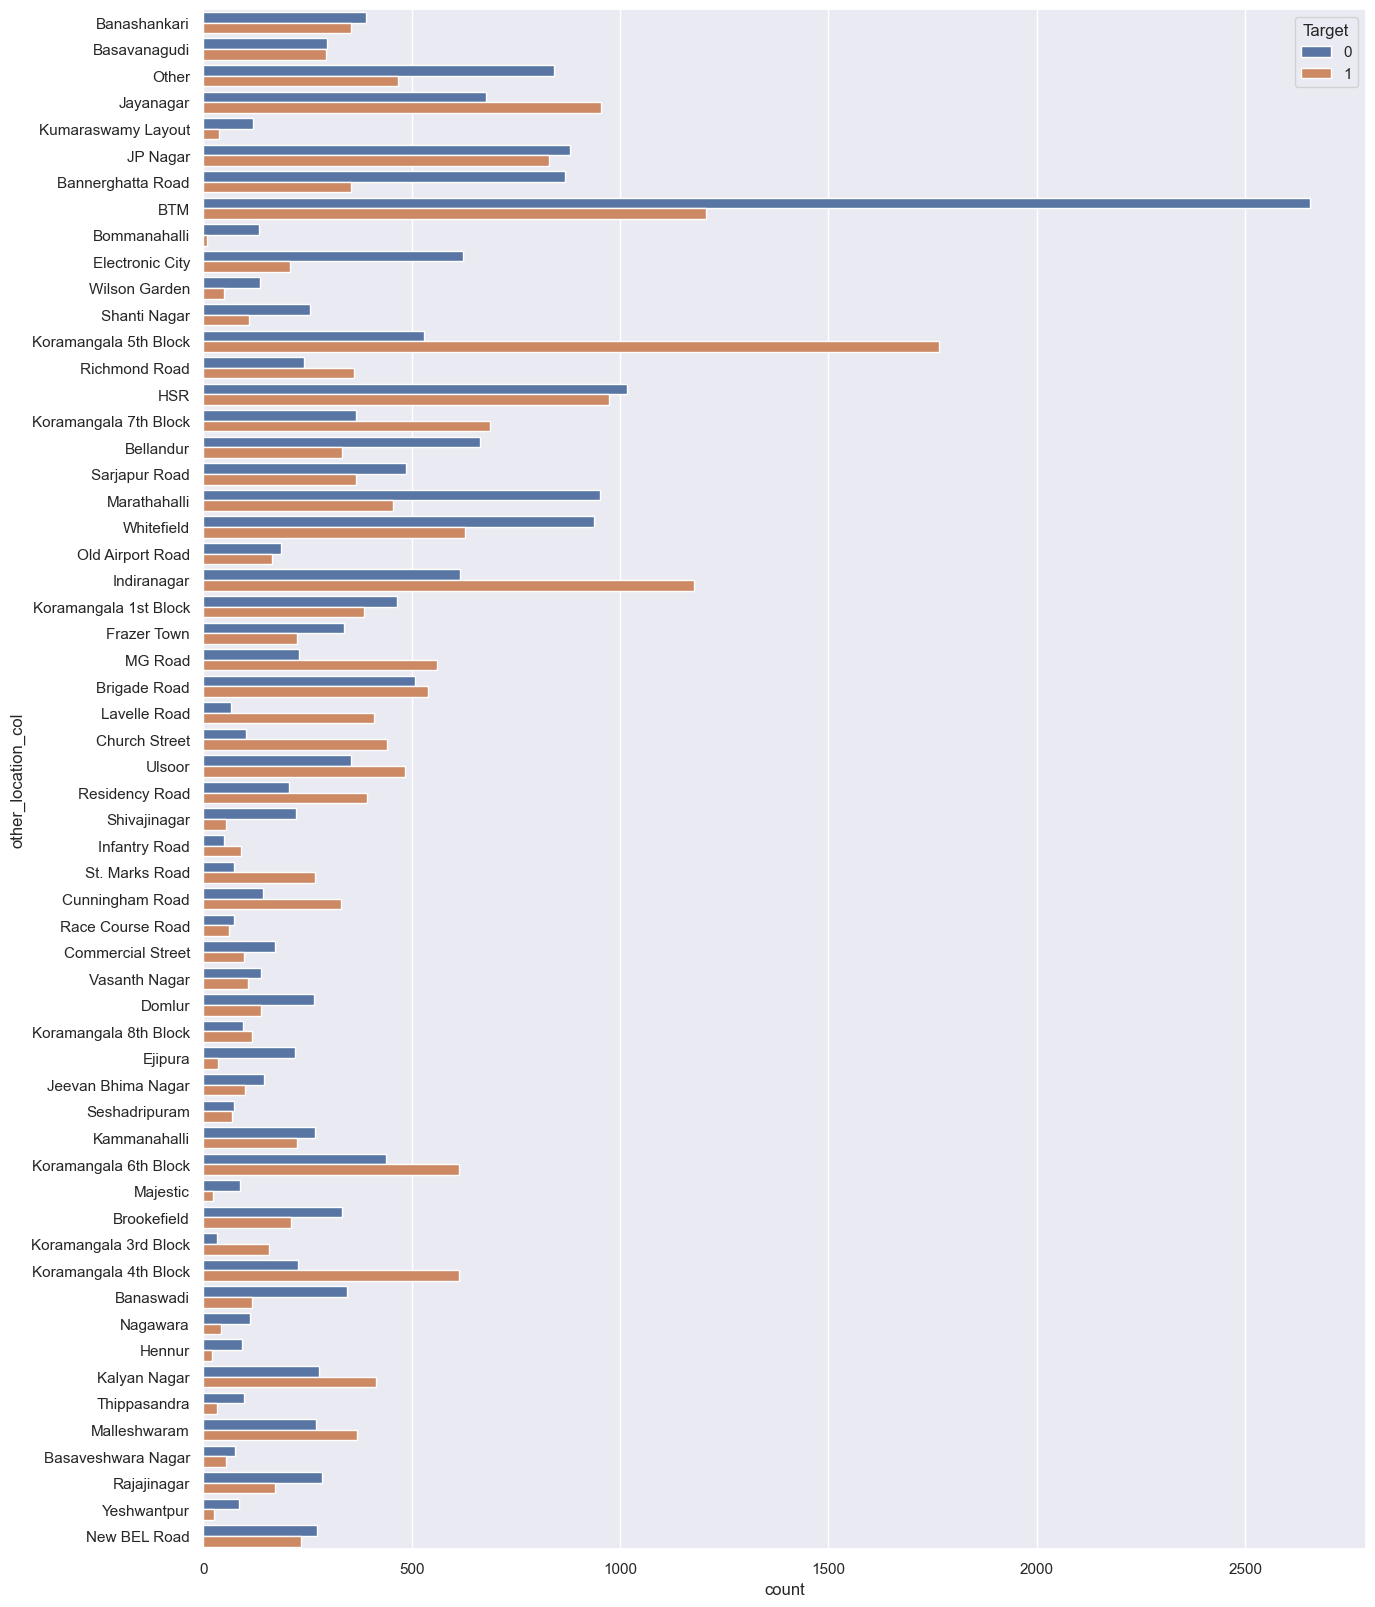

In [253]:
sns.set(rc={'figure.figsize':(15,20)})
sns.countplot(data=df,y='other_location_col', hue='Target')

In [254]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [255]:
len(df['rest_type'].unique())

87

In [256]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   13842
Casual Dining                  9596
Cafe                           3364
Dessert Parlor                 1848
Delivery                       1666
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Name: count, Length: 87, dtype: int64

In [257]:
df['rest_types_standardized'] = df['rest_type'].apply(lambda x: ', '.join(sorted(x.split(', '))))

unique_values = df['rest_types_standardized'].unique()
len(unique_values)

66

So , the unique values is decreased in the rest_type column from 87 to 66 value as it seems like there were a hidden repeated values in it. 

In [258]:
df['rest_types_standardized'].value_counts()

rest_types_standardized
Quick Bites                  13842
Casual Dining                 9596
Cafe                          3364
Dessert Parlor                1848
Delivery                      1666
                             ...  
Dessert Parlor, Kiosk            2
Cafe, Food Court                 2
Beverage Shop, Food Court        2
Bakery, Beverage Shop            1
Kiosk, Quick Bites               1
Name: count, Length: 66, dtype: int64

In [259]:
threshold = 200
category_counts = df['rest_types_standardized'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
len(rare_categories)
#rare_categories

44

In [260]:
df['other_rest_type_col'] = df['rest_types_standardized'].apply(lambda x: 'Other' if x in rare_categories else x)

In [261]:
len(df['other_rest_type_col'].unique())

23

<Axes: xlabel='count', ylabel='other_rest_type_col'>

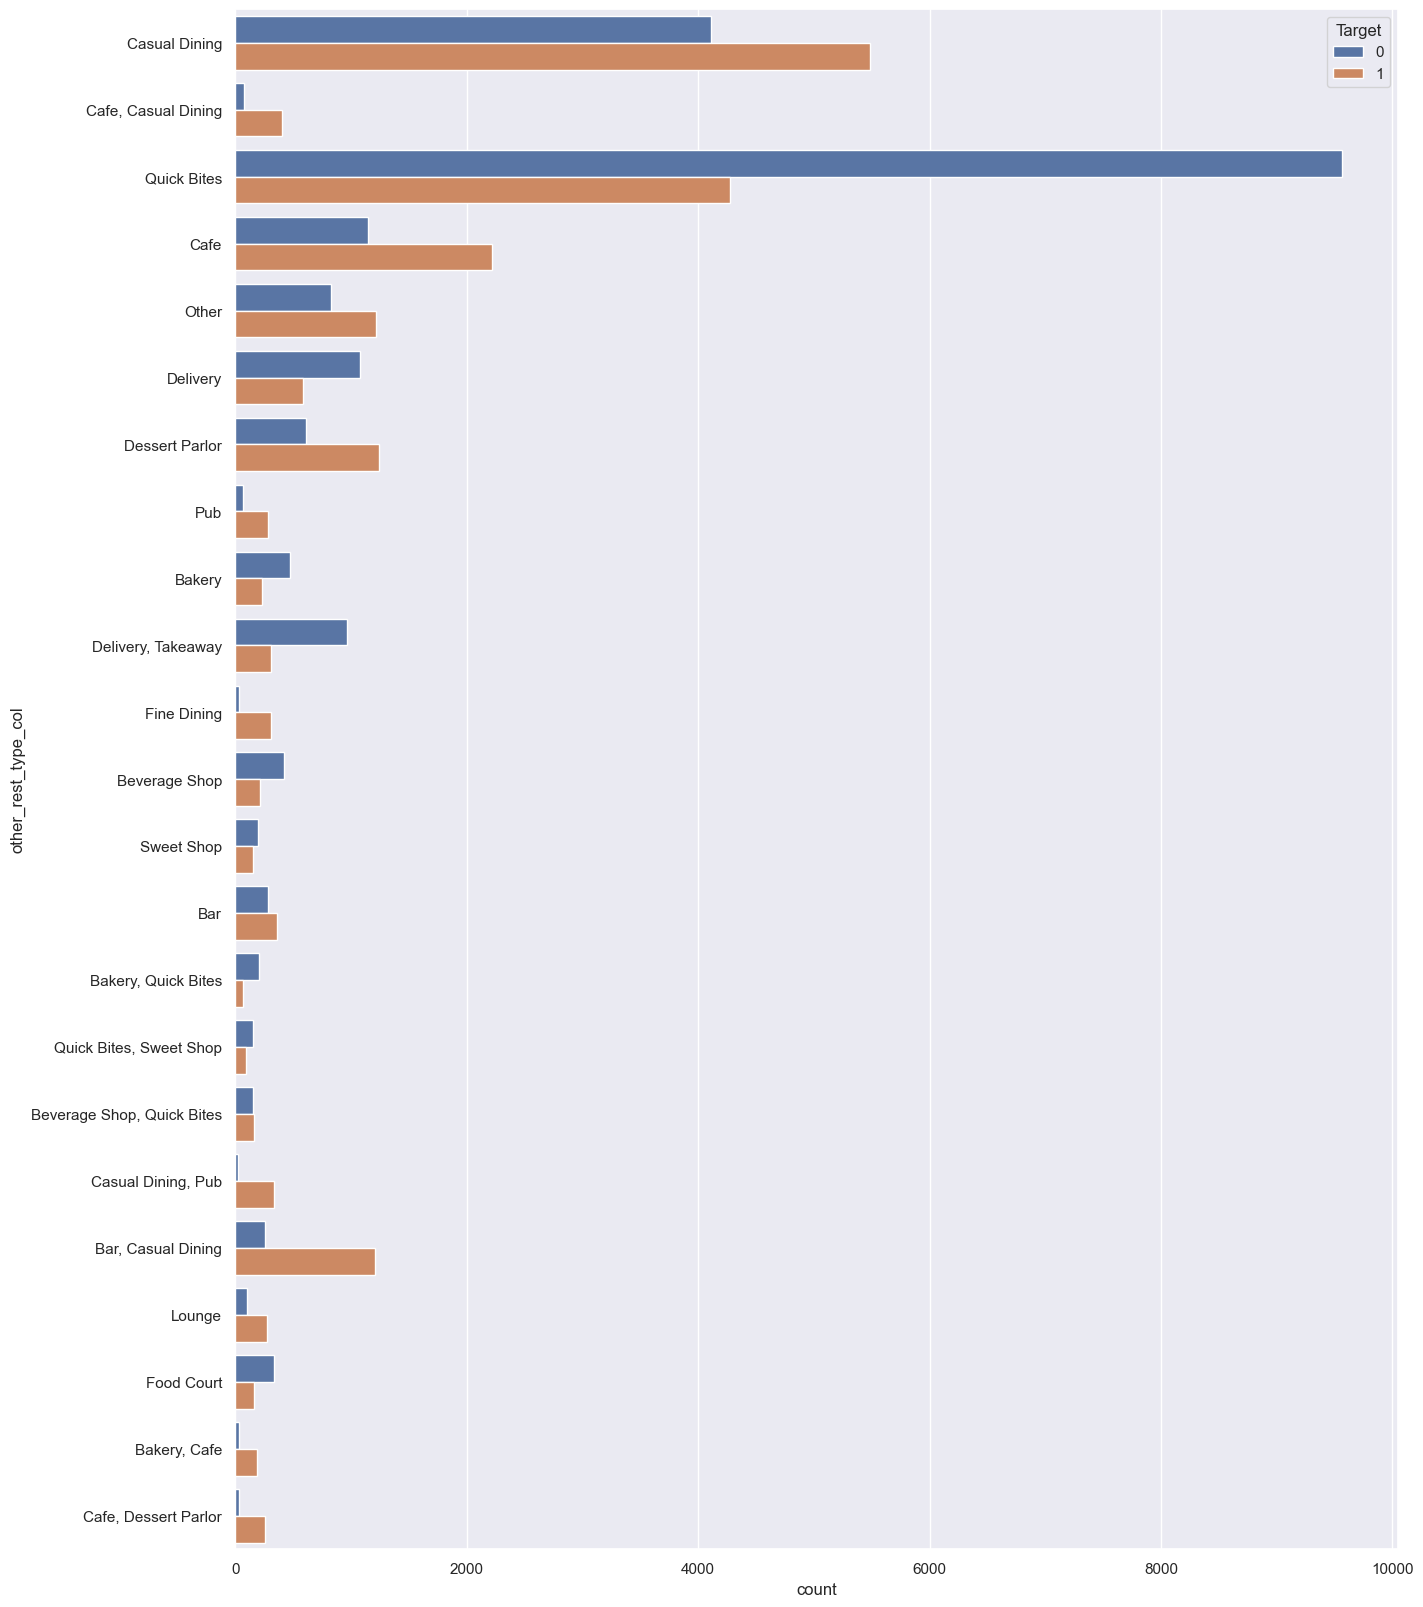

In [262]:
sns.set(rc={'figure.figsize':(15,20)})
sns.countplot(data=df,y='other_rest_type_col', hue='Target')

In [263]:
len(df['cuisines'].unique())

2367

In [265]:
df['cuisines'] = df['cuisines'].apply(lambda x: ','.join(x.split(',')[:2]) if len(x.split(',')) >=2 else x)

In [266]:
df.head(2)

,online_order,book_table,Target,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),locations_standardized,other_location_col,rest_types_standardized,other_rest_type_col
0,Yes,Yes,1,775,Banashankari,Casual Dining,"North Indian, Mughlai",800.0,Buffet,Banashankari,Banashankari,Banashankari,Casual Dining,Casual Dining
1,Yes,No,1,787,Banashankari,Casual Dining,"Chinese, North Indian",800.0,Buffet,Banashankari,Banashankari,Banashankari,Casual Dining,Casual Dining


In [267]:
len(df['cuisines'].unique())

719

In [268]:
df['cuisines'].value_counts()

cuisines
North Indian, Chinese         3758
North Indian                  2103
South Indian, North Indian    1304
South Indian                  1226
North Indian, South Indian     922
                              ... 
Desserts, Continental            1
Momos, Chinese                   1
Biryani, Bengali                 1
BBQ, Rolls                       1
South Indian, Asian              1
Name: count, Length: 719, dtype: int64

In [269]:
threshold = 30
category_counts = df['cuisines'].value_counts()
rare_categories = category_counts[category_counts <= threshold].index
len(rare_categories)
#rare_categories

520

In [270]:
df['other_cuisines_col'] = df['cuisines'].apply(lambda x: 'Other' if x in rare_categories else x)

In [271]:
df['other_cuisines_col'].value_counts()

other_cuisines_col
Other                          5212
North Indian, Chinese          3758
North Indian                   2103
South Indian, North Indian     1304
South Indian                   1226
                               ... 
Cafe, Mediterranean              31
North Indian, Lucknowi           31
North Indian, Rolls              31
North Indian, Pizza              31
North Indian, Mediterranean      31
Name: count, Length: 200, dtype: int64

In [272]:
len(df['other_cuisines_col'].unique())

200

#####So , the unique values is decreased in the cuisines column from 2367 to 1688 value as it seems like there were a hidden repeated values in it. 

In [273]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

<Axes: xlabel='listed_in(type)', ylabel='count'>

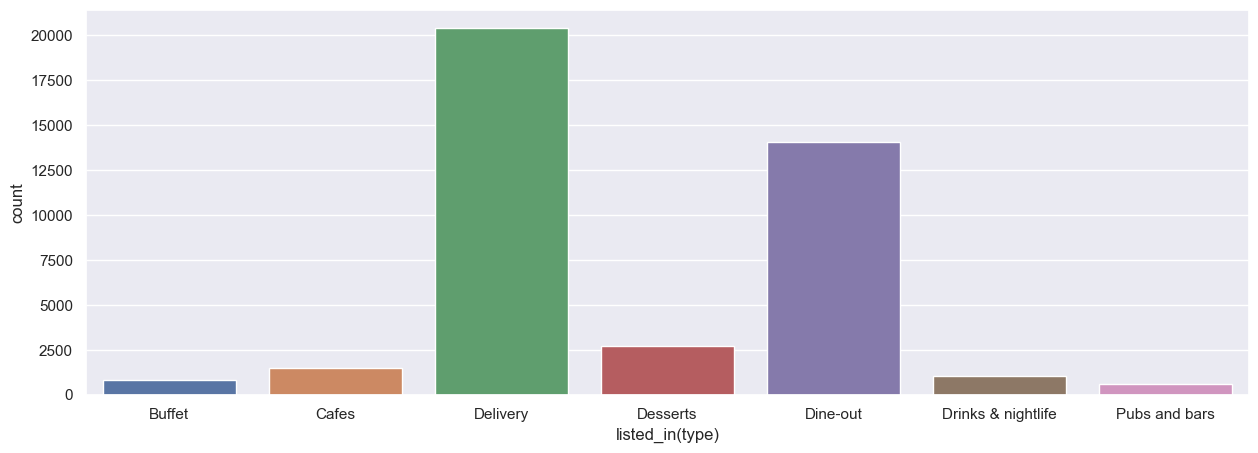

In [274]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(df,x='listed_in(type)')

<Axes: xlabel='listed_in(type)', ylabel='count'>

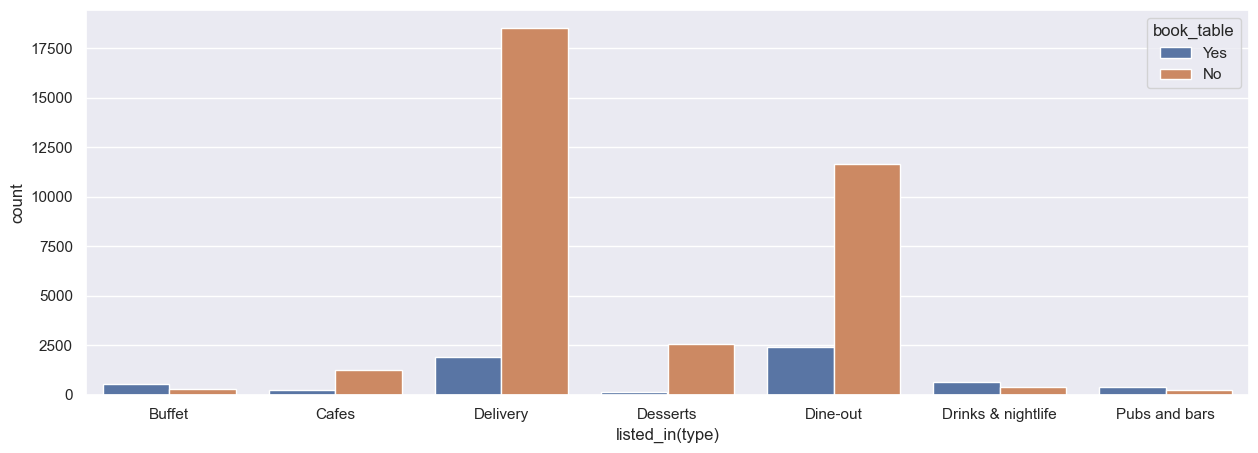

In [275]:
sns.countplot(df,x='listed_in(type)',hue='book_table')

<Axes: xlabel='listed_in(type)', ylabel='count'>

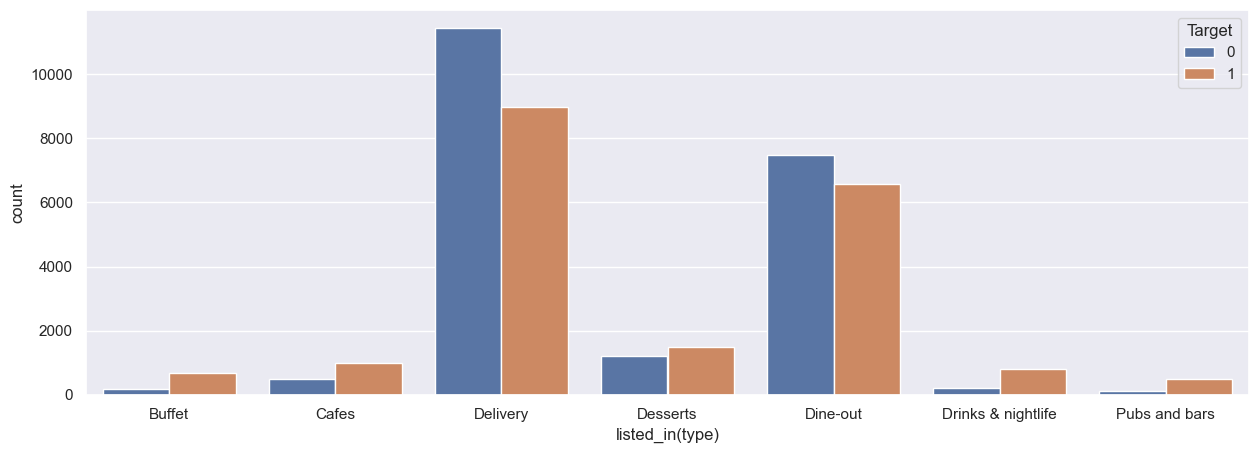

In [276]:
#sns.set(rc={'figure.figsize':(10,3)})
sns.countplot(df, x="listed_in(type)", hue="Target")

In [277]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [278]:
len(df['listed_in(city)'].unique())

30

In [279]:
'''
df['cities_standardized'] = df['listed_in(city)'].apply(lambda x: ', '.join(sorted(x.split(', '))))

unique_values = df['cities_standardized'].unique()
len(unique_values)
'''

"\ndf['cities_standardized'] = df['listed_in(city)'].apply(lambda x: ', '.join(sorted(x.split(', '))))\n\nunique_values = df['cities_standardized'].unique()\nlen(unique_values)\n"

In [280]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      2573
Koramangala 7th Block    2359
Koramangala 4th Block    2252
Koramangala 5th Block    2244
Koramangala 6th Block    2119
Jayanagar                1914
JP Nagar                 1632
Indiranagar              1535
MG Road                  1509
Church Street            1493
Brigade Road             1481
Lavelle Road             1449
Residency Road           1344
HSR                      1328
Marathahalli             1292
Bannerghatta Road        1207
Whitefield               1198
Old Airport Road         1171
Brookefield              1139
Basavanagudi             1070
Sarjapur Road            1017
Kammanahalli             1017
Kalyan Nagar              989
Frazer Town               952
Bellandur                 952
Malleshwaram              945
Rajajinagar               870
Electronic City           818
Banashankari              726
New BEL Road              569
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='listed_in(city)'>

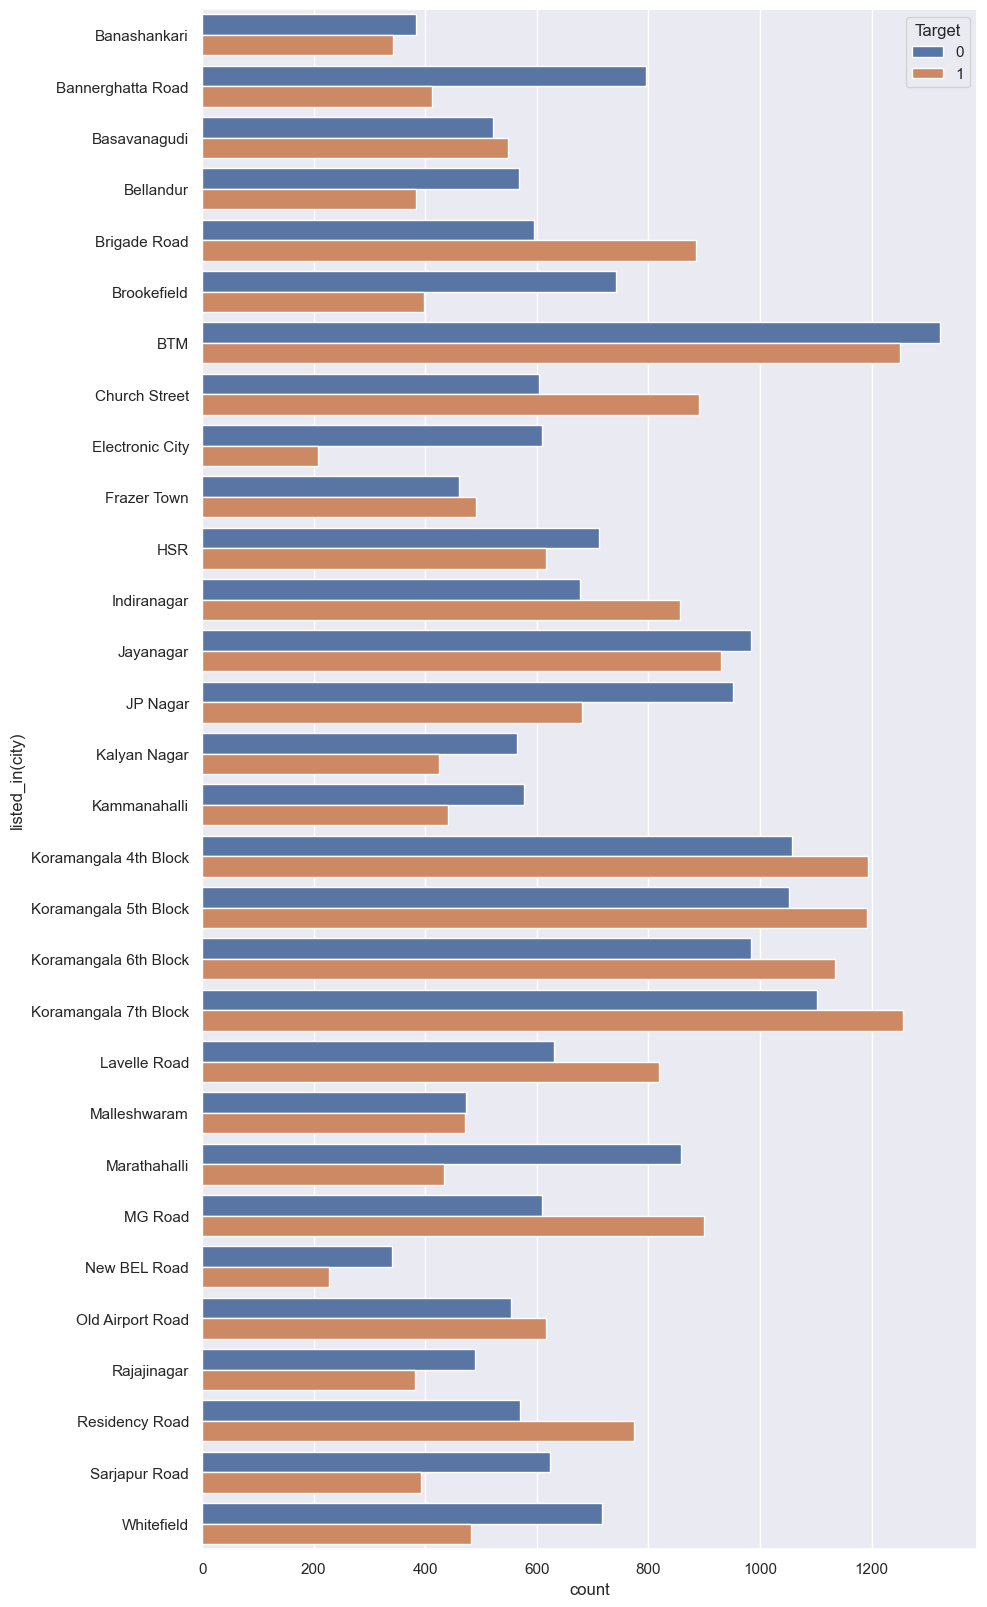

In [281]:
sns.set(rc={'figure.figsize':(10,20)})
sns.countplot(df, y="listed_in(city)", hue="Target")

In [282]:
df.head(3)

,online_order,book_table,Target,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),locations_standardized,other_location_col,rest_types_standardized,other_rest_type_col,other_cuisines_col
0,Yes,Yes,1,775,Banashankari,Casual Dining,"North Indian, Mughlai",800.0,Buffet,Banashankari,Banashankari,Banashankari,Casual Dining,Casual Dining,"North Indian, Mughlai"
1,Yes,No,1,787,Banashankari,Casual Dining,"Chinese, North Indian",800.0,Buffet,Banashankari,Banashankari,Banashankari,Casual Dining,Casual Dining,"Chinese, North Indian"
2,Yes,No,1,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican",800.0,Buffet,Banashankari,Banashankari,Banashankari,"Cafe, Casual Dining","Cafe, Casual Dining",Other


In [283]:
df.columns

Index(['online_order', 'book_table', 'Target', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'locations_standardized',
       'other_location_col', 'rest_types_standardized', 'other_rest_type_col',
       'other_cuisines_col'],
      dtype='object')

In [286]:
columns = ['location','rest_type','cuisines','locations_standardized','rest_types_standardized']
df.drop(columns, inplace=True, axis=1)

In [287]:
df

,online_order,book_table,Target,votes,approx_cost(for two people),listed_in(type),listed_in(city),other_location_col,other_rest_type_col,other_cuisines_col
0,Yes,Yes,1,775,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"North Indian, Mughlai"
1,Yes,No,1,787,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"Chinese, North Indian"
2,Yes,No,1,918,800.0,Buffet,Banashankari,Banashankari,"Cafe, Casual Dining",Other
3,No,No,0,88,300.0,Buffet,Banashankari,Banashankari,Quick Bites,"South Indian, North Indian"
4,No,No,1,166,600.0,Buffet,Banashankari,Basavanagudi,Casual Dining,Other
...,...,...,...,...,...,...,...,...,...,...
51709,No,No,0,34,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","North Indian, Continental"
51711,No,No,0,81,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","Andhra, South Indian"
51712,No,No,0,27,1500.0,Pubs and bars,Whitefield,Whitefield,Bar,Continental
51715,No,Yes,1,236,2500.0,Pubs and bars,Whitefield,Other,Bar,Finger Food


In [2]:
df.to_csv('clean_d.csv')

NameError: name 'df' is not defined

## Working with data after cleaning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
df_cleaned=pd.read_csv('clean_d.csv')
df_cleaned

NameError: name 'pd' is not defined

In [4]:
df_cleaned.columns

Index(['Unnamed: 0', 'online_order', 'book_table', 'Target', 'votes',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'other_location_col', 'other_rest_type_col', 'other_cuisines_col'],
      dtype='object')

In [5]:
df_cleaned['online_order'] = df_cleaned['online_order'].replace({'Yes': 1, 'No': 0})
df_cleaned['book_table'] = df_cleaned['book_table'].replace({'Yes': 1, 'No': 0})

In [6]:
df_cleaned

,Unnamed: 0,online_order,book_table,Target,votes,approx_cost(for two people),listed_in(type),listed_in(city),other_location_col,other_rest_type_col,other_cuisines_col
0,0,1,1,1,775,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"North Indian, Mughlai"
1,1,1,0,1,787,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"Chinese, North Indian"
2,2,1,0,1,918,800.0,Buffet,Banashankari,Banashankari,"Cafe, Casual Dining",Other
3,3,0,0,0,88,300.0,Buffet,Banashankari,Banashankari,Quick Bites,"South Indian, North Indian"
4,4,0,0,1,166,600.0,Buffet,Banashankari,Basavanagudi,Casual Dining,Other
...,...,...,...,...,...,...,...,...,...,...,...
41159,51709,0,0,0,34,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","North Indian, Continental"
41160,51711,0,0,0,81,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","Andhra, South Indian"
41161,51712,0,0,0,27,1500.0,Pubs and bars,Whitefield,Whitefield,Bar,Continental
41162,51715,0,1,1,236,2500.0,Pubs and bars,Whitefield,Other,Bar,Finger Food


In [7]:
df_cleaned.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df_cleaned

,online_order,book_table,Target,votes,approx_cost(for two people),listed_in(type),listed_in(city),other_location_col,other_rest_type_col,other_cuisines_col
0,1,1,1,775,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"North Indian, Mughlai"
1,1,0,1,787,800.0,Buffet,Banashankari,Banashankari,Casual Dining,"Chinese, North Indian"
2,1,0,1,918,800.0,Buffet,Banashankari,Banashankari,"Cafe, Casual Dining",Other
3,0,0,0,88,300.0,Buffet,Banashankari,Banashankari,Quick Bites,"South Indian, North Indian"
4,0,0,1,166,600.0,Buffet,Banashankari,Basavanagudi,Casual Dining,Other
...,...,...,...,...,...,...,...,...,...,...
41159,0,0,0,34,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","North Indian, Continental"
41160,0,0,0,81,800.0,Pubs and bars,Whitefield,Whitefield,"Bar, Casual Dining","Andhra, South Indian"
41161,0,0,0,27,1500.0,Pubs and bars,Whitefield,Whitefield,Bar,Continental
41162,0,1,1,236,2500.0,Pubs and bars,Whitefield,Other,Bar,Finger Food


In [10]:
# Apply Frequency Encoding
for col in ['listed_in(type)', 'listed_in(city)', 'other_location_col','other_rest_type_col','other_cuisines_col']:
    freq_encoding = df_cleaned[col].value_counts(normalize=True)  # Get the frequency of each category
    df_cleaned[col + '_freq'] = df_cleaned[col].map(freq_encoding)        # Map frequencies to the column

# Drop original categorical columns as we only want the frequency-encoded columns
df_encoded = df_cleaned.drop(columns=['listed_in(type)', 'listed_in(city)', 'other_location_col','other_rest_type_col','other_cuisines_col'])

print("Encoded Data:")
print(df_encoded)


Encoded Data:
       online_order  book_table  Target  votes  approx_cost(for two people)  \
0                 1           1       1    775                        800.0   
1                 1           0       1    787                        800.0   
2                 1           0       1    918                        800.0   
3                 0           0       0     88                        300.0   
4                 0           0       1    166                        600.0   
...             ...         ...     ...    ...                          ...   
41159             0           0       0     34                        800.0   
41160             0           0       0     81                        800.0   
41161             0           0       0     27                       1500.0   
41162             0           1       1    236                       2500.0   
41163             0           0       0     13                       1500.0   

       listed_in(type)_freq  listed_i

In [11]:
df_encoded

,online_order,book_table,Target,votes,approx_cost(for two people),listed_in(type)_freq,listed_in(city)_freq,other_location_col_freq,other_rest_type_col_freq,other_cuisines_col_freq
0,1,1,1,775,800.0,0.020552,0.017637,0.018074,0.233116,0.015499
1,1,0,1,787,800.0,0.020552,0.017637,0.018074,0.233116,0.016325
2,1,0,1,918,800.0,0.020552,0.017637,0.018074,0.011734,0.126615
3,0,0,0,88,300.0,0.020552,0.017637,0.018074,0.336265,0.031678
4,0,0,1,166,600.0,0.020552,0.017637,0.014381,0.233116,0.126615
...,...,...,...,...,...,...,...,...,...,...
41159,0,0,0,34,800.0,0.015305,0.029103,0.038019,0.035662,0.009280
41160,0,0,0,81,800.0,0.015305,0.029103,0.038019,0.035662,0.002284
41161,0,0,0,27,1500.0,0.015305,0.029103,0.038019,0.015548,0.003838
41162,0,1,1,236,2500.0,0.015305,0.029103,0.031800,0.015548,0.006073


In [22]:
# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['Target'])  # Features (encoded columns)
y = df_encoded['Target']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the frequency-encoded data for SVC
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print("\nTraining Features (after standardization):")
#print(X_train_scaled)


In [23]:
# Initialize the Support Vector Classifier
svc_model = SVC(kernel='linear', random_state=42)

# Train the SVC model on the training data
svc_model.fit(X_train_scaled, y_train)

#print("\nSVC model training complete!")


SVC(kernel='linear', random_state=42)

In [24]:
# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)



In [25]:
print(f"\nSVC Model Accuracy: {accuracy * 100:.2f}%")


SVC Model Accuracy: 77.10%


# applying randomforest model

In [27]:
# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['Target'])  # Features (encoded columns)
y = df_encoded['Target']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 96.44%


### Working on RandomForestClassifier model

In [5]:
from sklearn.ensemble import RandomForestClassifier
import joblib

In [30]:
joblib.dump(model, 'your_model.pkl')

['your_model.pkl']

In [6]:
model = joblib.load('your_model.pkl')

In [40]:
online_order = ['0', '1']
book_table = ['0', '1']
listed_in_type= ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars']
listed_in_city = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur','Brigade Road', 'Brookefield', 'BTM', 'Church Street','Electronic City', 'Frazer Town', 'HSR', 'Indiranagar','Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli','Koramangala 4th Block', 'Koramangala 5th Block','Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road','Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road','Old Airport Road', 'Rajajinagar', 'Residency Road','Sarjapur Road', 'Whitefield']
other_location_col = ['Banashankari', 'Basavanagudi', 'Other', 'Jayanagar','Kumaraswamy Layout', 'JP Nagar', 'Bannerghatta Road', 'BTM','Bommanahalli', 'Electronic City', 'Wilson Garden', 'Shanti Nagar','Koramangala 5th Block', 'Richmond Road', 'HSR','Koramangala 7th Block', 'Bellandur', 'Sarjapur Road','Marathahalli', 'Whitefield', 'Old Airport Road', 'Indiranagar','Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road','Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road','Shivajinagar', 'Infantry Road', 'St. Marks Road','Cunningham Road', 'Race Course Road', 'Commercial Street','Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura','Jeevan Bhima Nagar', 'Seshadripuram', 'Kammanahalli','Koramangala 6th Block', 'Majestic', 'Brookefield','Koramangala 3rd Block', 'Koramangala 4th Block', 'Banaswadi','Nagawara', 'Hennur', 'Kalyan Nagar', 'Thippasandra','Malleshwaram', 'Basaveshwara Nagar', 'Rajajinagar', 'Yeshwantpur','New BEL Road']
other_rest_type_col = ['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites', 'Cafe','Other', 'Delivery', 'Dessert Parlor', 'Pub', 'Bakery','Delivery, Takeaway', 'Fine Dining', 'Beverage Shop', 'Sweet Shop','Bar', 'Bakery, Quick Bites', 'Quick Bites, Sweet Shop','Beverage Shop, Quick Bites', 'Casual Dining, Pub','Bar, Casual Dining', 'Lounge', 'Food Court', 'Bakery, Cafe','Cafe, Dessert Parlor']
other_cuisines_col = ['North Indian, Mughlai', 'Chinese, North Indian', 'Other','South Indian, North Indian', 'North Indian','North Indian, South Indian', 'Pizza, Cafe', 'Cafe, Italian','Cafe', 'Cafe, Chinese', 'Cafe, Continental', 'Cafe, Fast Food','Italian, Fast Food', 'Cafe, Bakery', 'North Indian, Fast Food','Bakery, Desserts', 'Pizza', 'North Indian, Biryani', 'Biryani','North Indian, Chinese', 'Chinese, Thai', 'South Indian','Street Food, Fast Food', 'Burger, Fast Food', 'Pizza, Fast Food','North Indian, Continental', 'Fast Food, Street Food','Ice Cream, Desserts', 'Biryani, North Indian','Italian, Continental', 'Biryani, Fast Food', 'Fast Food, Burger','Desserts, Beverages', 'Italian, North Indian', 'Chinese','Bakery', 'North Indian, Kebab', 'Continental, Italian','Biryani, Chinese', 'Chinese, Continental', 'Fast Food, Rolls','Biryani, South Indian', 'Fast Food', 'South Indian, Chinese','Seafood, North Indian', 'Beverages, Desserts','Mithai, Street Food', 'Desserts', 'Ice Cream','South Indian, Biryani', 'Desserts, Ice Cream','Beverages, Juices', 'Cafe, Beverages', 'Beverages, Ice Cream','Italian, Pizza', 'Salad, Healthy Food', 'Street Food','Fast Food, Pizza', 'Biryani, Andhra', 'Cafe, Burger','Beverages, Sandwich', 'Italian', 'Bengali, Chinese','North Indian, Street Food', 'Arabian', 'Mangalorean, Seafood','Continental, Fast Food', 'Chinese, Fast Food', 'Italian, Salad','Andhra', 'Pizza, Italian', 'Andhra, South Indian','Mithai, Desserts', 'Juices, Beverages', 'Salad, Fast Food','Seafood, Biryani', 'South Indian, Beverages','Beverages, Fast Food', 'South Indian, Fast Food','Cafe, American', 'Street Food, North Indian','South Indian, Street Food', 'Fast Food, Chinese','Juices, Fast Food', 'Fast Food, Desserts','North Indian, Seafood', 'Seafood, Mangalorean','Andhra, North Indian', 'Beverages', 'Continental, Finger Food','Ice Cream, Beverages', 'Mithai', 'Desserts, Fast Food','Tibetan, Momos', 'Juices', 'Tea, Beverages','Healthy Food, North Indian', 'Fast Food, Sandwich','Andhra, Biryani', 'Finger Food', 'Chinese, Momos','Mangalorean, Chinese', 'Continental', 'Mughlai, North Indian','Fast Food, Beverages', 'Street Food, Rolls','North Indian, Italian', 'North Indian, European','Cafe, Healthy Food', 'Cafe, Desserts', 'Desserts, Cafe','Cafe, North Indian', 'Cafe, Sandwich', 'Continental, Burger','Bengali, North Indian', 'Kerala, Seafood', 'Andhra, Chinese','Kerala, South Indian', 'Biryani, Kebab', 'Bengali','Fast Food, North Indian', 'Arabian, North Indian','North Indian, BBQ', 'Mexican, American', 'South Indian, Andhra','Rajasthani', 'Healthy Food', 'Asian, Continental','Street Food, Mithai', 'Continental, North Indian','Kerala, North Indian', 'Continental, American','South Indian, Kerala', 'Mithai, North Indian', 'Chinese, Tibetan','Street Food, Beverages', 'Rajasthani, North Indian','Finger Food, Chinese', 'Bakery, Fast Food', 'Fast Food, Juices','Mexican, Fast Food', 'Continental, Chinese', 'Arabian, Chinese','North Indian, Arabian', 'Desserts, Bakery','Chinese, South Indian', 'Kerala', 'Finger Food, Continental','Maharashtrian', 'North Indian, Kerala', 'Kerala, Chinese','Chinese, Asian', 'European, Continental','Finger Food, North Indian', 'South Indian, Chettinad','Cafe, Salad', 'North Indian, Beverages', 'Continental, Mexican','Biryani, Mughlai', 'Asian, Chinese', 'European, Mediterranean','North Indian, Lucknowi', 'Ice Cream, Cafe', 'Kerala, Biryani','American, North Indian', 'Biryani, Hyderabadi','Healthy Food, Beverages', 'Mithai, Fast Food', 'Modern Indian','European, American', 'Seafood, South Indian','North Indian, Rolls', 'Tibetan, Chinese', 'Continental, Pizza','Bengali, Seafood', 'American, Continental', 'Continental, Asian','Continental, South Indian', 'Bakery, Cafe', 'Cafe, Tea','Continental, Cafe', 'North Indian, Thai', 'European, Italian','Fast Food, Biryani', 'Cafe, Mediterranean','Healthy Food, Sandwich', 'Italian, American','Continental, Mediterranean', 'Goan, Mangalorean', 'Asian','Ice Cream, Bakery', 'Mexican', 'Asian, Japanese','Continental, BBQ', 'Japanese', 'Chettinad, South Indian','Continental, Steak', 'North Indian, Pizza','North Indian, Mediterranean', 'North Indian, Bengali']


In [23]:
import gradio as gr
import joblib
import numpy as np

# Load the model
model = joblib.load('your_model.pkl')

# Define prediction function
def predict(dropdown_1, dropdown_2, dropdown_3, dropdown_4, dropdown_5, dropdown_6, dropdown_7, num_input_1, num_input_2):
    # Prepare input for model
    input_data = np.array([[dropdown_1, dropdown_2, dropdown_3, dropdown_4, dropdown_5, dropdown_6, dropdown_7, num_input_1, num_input_2]])
    
    # Make prediction
    prediction = model.predict(input_data)
    
    return prediction[0]

# Distinct values for dropdowns
dropdown_values_1 = ['0', '1']
dropdown_values_2 = ['0', '1']
dropdown_values_3 = ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars']
dropdown_values_4 = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur','Brigade Road', 'Brookefield', 'BTM', 'Church Street','Electronic City', 'Frazer Town', 'HSR', 'Indiranagar','Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli','Koramangala 4th Block', 'Koramangala 5th Block','Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road','Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road','Old Airport Road', 'Rajajinagar', 'Residency Road','Sarjapur Road', 'Whitefield']
dropdown_values_5 = ['Banashankari', 'Basavanagudi', 'Other', 'Jayanagar','Kumaraswamy Layout', 'JP Nagar', 'Bannerghatta Road', 'BTM','Bommanahalli', 'Electronic City', 'Wilson Garden', 'Shanti Nagar','Koramangala 5th Block', 'Richmond Road', 'HSR','Koramangala 7th Block', 'Bellandur', 'Sarjapur Road','Marathahalli', 'Whitefield', 'Old Airport Road', 'Indiranagar','Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road','Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road','Shivajinagar', 'Infantry Road', 'St. Marks Road','Cunningham Road', 'Race Course Road', 'Commercial Street','Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura','Jeevan Bhima Nagar', 'Seshadripuram', 'Kammanahalli','Koramangala 6th Block', 'Majestic', 'Brookefield','Koramangala 3rd Block', 'Koramangala 4th Block', 'Banaswadi','Nagawara', 'Hennur', 'Kalyan Nagar', 'Thippasandra','Malleshwaram', 'Basaveshwara Nagar', 'Rajajinagar', 'Yeshwantpur','New BEL Road']
dropdown_values_6 = ['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites', 'Cafe','Other', 'Delivery', 'Dessert Parlor', 'Pub', 'Bakery','Delivery, Takeaway', 'Fine Dining', 'Beverage Shop', 'Sweet Shop','Bar', 'Bakery, Quick Bites', 'Quick Bites, Sweet Shop','Beverage Shop, Quick Bites', 'Casual Dining, Pub','Bar, Casual Dining', 'Lounge', 'Food Court', 'Bakery, Cafe','Cafe, Dessert Parlor']
dropdown_values_7 = ['North Indian, Mughlai', 'Chinese, North Indian', 'Other','South Indian, North Indian', 'North Indian','North Indian, South Indian', 'Pizza, Cafe', 'Cafe, Italian','Cafe', 'Cafe, Chinese', 'Cafe, Continental', 'Cafe, Fast Food','Italian, Fast Food', 'Cafe, Bakery', 'North Indian, Fast Food','Bakery, Desserts', 'Pizza', 'North Indian, Biryani', 'Biryani','North Indian, Chinese', 'Chinese, Thai', 'South Indian','Street Food, Fast Food', 'Burger, Fast Food', 'Pizza, Fast Food','North Indian, Continental', 'Fast Food, Street Food','Ice Cream, Desserts', 'Biryani, North Indian','Italian, Continental', 'Biryani, Fast Food', 'Fast Food, Burger','Desserts, Beverages', 'Italian, North Indian', 'Chinese','Bakery', 'North Indian, Kebab', 'Continental, Italian','Biryani, Chinese', 'Chinese, Continental', 'Fast Food, Rolls','Biryani, South Indian', 'Fast Food', 'South Indian, Chinese','Seafood, North Indian', 'Beverages, Desserts','Mithai, Street Food', 'Desserts', 'Ice Cream','South Indian, Biryani', 'Desserts, Ice Cream','Beverages, Juices', 'Cafe, Beverages', 'Beverages, Ice Cream','Italian, Pizza', 'Salad, Healthy Food', 'Street Food','Fast Food, Pizza', 'Biryani, Andhra', 'Cafe, Burger','Beverages, Sandwich', 'Italian', 'Bengali, Chinese','North Indian, Street Food', 'Arabian', 'Mangalorean, Seafood','Continental, Fast Food', 'Chinese, Fast Food', 'Italian, Salad','Andhra', 'Pizza, Italian', 'Andhra, South Indian','Mithai, Desserts', 'Juices, Beverages', 'Salad, Fast Food','Seafood, Biryani', 'South Indian, Beverages','Beverages, Fast Food', 'South Indian, Fast Food','Cafe, American', 'Street Food, North Indian','South Indian, Street Food', 'Fast Food, Chinese','Juices, Fast Food', 'Fast Food, Desserts','North Indian, Seafood', 'Seafood, Mangalorean','Andhra, North Indian', 'Beverages', 'Continental, Finger Food','Ice Cream, Beverages', 'Mithai', 'Desserts, Fast Food','Tibetan, Momos', 'Juices', 'Tea, Beverages','Healthy Food, North Indian', 'Fast Food, Sandwich','Andhra, Biryani', 'Finger Food', 'Chinese, Momos','Mangalorean, Chinese', 'Continental', 'Mughlai, North Indian','Fast Food, Beverages', 'Street Food, Rolls','North Indian, Italian', 'North Indian, European','Cafe, Healthy Food', 'Cafe, Desserts', 'Desserts, Cafe','Cafe, North Indian', 'Cafe, Sandwich', 'Continental, Burger','Bengali, North Indian', 'Kerala, Seafood', 'Andhra, Chinese','Kerala, South Indian', 'Biryani, Kebab', 'Bengali','Fast Food, North Indian', 'Arabian, North Indian','North Indian, BBQ', 'Mexican, American', 'South Indian, Andhra','Rajasthani', 'Healthy Food', 'Asian, Continental','Street Food, Mithai', 'Continental, North Indian','Kerala, North Indian', 'Continental, American','South Indian, Kerala', 'Mithai, North Indian', 'Chinese, Tibetan','Street Food, Beverages', 'Rajasthani, North Indian','Finger Food, Chinese', 'Bakery, Fast Food', 'Fast Food, Juices','Mexican, Fast Food', 'Continental, Chinese', 'Arabian, Chinese','North Indian, Arabian', 'Desserts, Bakery','Chinese, South Indian', 'Kerala', 'Finger Food, Continental','Maharashtrian', 'North Indian, Kerala', 'Kerala, Chinese','Chinese, Asian', 'European, Continental','Finger Food, North Indian', 'South Indian, Chettinad','Cafe, Salad', 'North Indian, Beverages', 'Continental, Mexican','Biryani, Mughlai', 'Asian, Chinese', 'European, Mediterranean','North Indian, Lucknowi', 'Ice Cream, Cafe', 'Kerala, Biryani','American, North Indian', 'Biryani, Hyderabadi','Healthy Food, Beverages', 'Mithai, Fast Food', 'Modern Indian','European, American', 'Seafood, South Indian','North Indian, Rolls', 'Tibetan, Chinese', 'Continental, Pizza','Bengali, Seafood', 'American, Continental', 'Continental, Asian','Continental, South Indian', 'Bakery, Cafe', 'Cafe, Tea','Continental, Cafe', 'North Indian, Thai', 'European, Italian','Fast Food, Biryani', 'Cafe, Mediterranean','Healthy Food, Sandwich', 'Italian, American','Continental, Mediterranean', 'Goan, Mangalorean', 'Asian','Ice Cream, Bakery', 'Mexican', 'Asian, Japanese','Continental, BBQ', 'Japanese', 'Chettinad, South Indian','Continental, Steak', 'North Indian, Pizza','North Indian, Mediterranean', 'North Indian, Bengali']

# Create Gradio interface
with gr.Blocks() as interface:
    gr.Markdown("# Model Prediction")
    gr.Markdown("Select values from the dropdowns and enter numbers to get a prediction.")
    
    # Create dropdown lists
    dropdown_1 = gr.Dropdown(choices=dropdown_values_1, label="online_order")
    dropdown_2 = gr.Dropdown(choices=dropdown_values_2, label="book_table")
    dropdown_3 = gr.Dropdown(choices=dropdown_values_3, label="listed_in_type")
    dropdown_4 = gr.Dropdown(choices=dropdown_values_4, label="listed_in_city")
    dropdown_5 = gr.Dropdown(choices=dropdown_values_5, label="other_location_col")
    dropdown_6 = gr.Dropdown(choices=dropdown_values_6, label="other_rest_type_col")
    dropdown_7 = gr.Dropdown(choices=dropdown_values_7, label="other_cuisines_col")
    
    # Numerical inputs
    num_input_1 = gr.Number(label="approx_cost")
    num_input_2 = gr.Number(label="votes number")
    
    # Output
    output = gr.Textbox(label="Prediction")

    # Predict button
    predict_button = gr.Button("Predict")
    
    # Set the prediction function to be called on button click
    predict_button.click(
        fn=predict,
        inputs=[dropdown_1, dropdown_2, dropdown_3, dropdown_4, dropdown_5, dropdown_6, dropdown_7, num_input_1, num_input_2],
        outputs=output
    )

# Launch the app
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
